# Multiple lineare Regression
## Fallbeispiel: Konzert
- Ein Club organisiert regelmäßig Konzerte
- Um den Umsatz zu optimieren möchten die Konzertveranstalter herausfinden, welche Faktoren zum Erfolg (Anzahl Besucher) eines Konzertes beitragen
- Aus ihrer langjährigen Erfahrung wissen sie, dass der Erfolg unter anderem vom Ticketpreis (in €), dem Werbeaufwand (in €), sowie dem Erfolg der Band (Anzahl verkaufter CDs) abhängt
- Dies möchte der Club nun statistisch überprüfen, um künftig den Erfolg eines Konzertes im Voraus besser abschätzen zu können

In [1]:
import pandas as pd
import statsmodels.api as sm

C:\Users\Dominik\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Datensatz
Der zu analysierende Datensatz enthält neben einer Identifikationsnummer des Anlasses (ID) die Besucherzahl des Anlasses (Besucher), den Ticketpreis (Preis), den betriebenen Werbeaufwand (Werbung) und die Anzahl verkaufter CDs (CD_Verkauf)

In [2]:
concert = pd.read_csv('https://github.com/Wurmloch/MultipleLinearRegression/raw/master/concert_mlr.csv', delimiter=';', index_col=0)
concert

,BESUCHER,PREIS,WERBUNG,CD_VERKAUF
ID,,,,
1,2585,112.50,2000,1090
2,1819,110.00,550,1070
3,1647,109.95,1000,990
4,1496,111.50,800,700
5,2278,110.00,1500,1020
6,1810,108.00,800,1100
7,1987,109.00,1200,920
8,1612,109.50,1100,870
9,1913,112.50,1300,790


In [3]:
independent_vars = concert[['PREIS', 'WERBUNG', 'CD_VERKAUF']]
dependent_var = concert['BESUCHER']

## Regressionsmodell
Mittels statsmodel wird das Regressionsmodell angewandt. Der Schätzung werden die abhängige Variable als auch die unabhängigen Variablen übergeben.

Dazu wird bei statsmodel die Methode der kleinsten Quadrate (KQ-Methode angewandt), welche in diesem Fall Schnittpunkte der Besucher auf den Preis, die Werbung und die Anzahl der verkauften CDs besitzt.

In [4]:
independent_vars = sm.add_constant(independent_vars)
estimation = sm.OLS(dependent_var, independent_vars.astype(float)).fit()

estimation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BESUCHER   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     47.65
Date:                Sat, 13 Jan 2018   Prob (F-statistic):           6.59e-12
Time:                        19:09:56   Log-Likelihood:                -230.94
No. Observations:                  36   AIC:                             469.9
Df Residuals:                      32   BIC:                             476.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5091.2127   1820.560      2.797      0.009    1382.853    8799.573
PREIS        -43.2267     16.550     -2.612      0.014     -76.938      -9.515
WERBUNG        0.5371      0.056      9.657      0.000       0.424       0.650
CD_VERKAUF     0.9651      0.168      5.759      0.000       0.624       1.306
==============================================================================
Omnibus:                       21.236   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.339
Skew:                          -0.065   Prob(JB):                        0.188
Kurtosis:                       1.514   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Alternative

In [5]:
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
estimation_alternative = smf.ols(formula='BESUCHER ~ PREIS + WERBUNG + CD_VERKAUF', data=concert).fit()
estimation_alternative.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BESUCHER   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     47.65
Date:                Sat, 13 Jan 2018   Prob (F-statistic):           6.59e-12
Time:                        19:09:56   Log-Likelihood:                -230.94
No. Observations:                  36   AIC:                             469.9
Df Residuals:                      32   BIC:                             476.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5091.2127   1820.560      2.797      0.009    1382.853    8799.573
PREIS        -43.2267     16.550     -2.612      0.014     -76.938      -9.515
WERBUNG        0.5371      0.056      9.657      0.000       0.424       0.650
CD_VERKAUF     0.9651      0.168      5.759      0.000       0.624       1.306
==============================================================================
Omnibus:                       21.236   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.339
Skew:                          -0.065   Prob(JB):                        0.188
Kurtosis:                       1.514   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualisierung
### Funktion
Es wird zunächst das Grid für den plot mit PREIS, WERBUNG und CD_VERKAUF erstellt.

Die Hyperebene wird dann erstellt, indem in die Formel der multiplen linearen Regression die berechneten Werte eingesetzt werden.

In [10]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# grid für 3d plot
xx1, xx2, xx3 = np.meshgrid(np.linspace(independent_vars.PREIS.min(), independent_vars.PREIS.max(), 100),
                       np.linspace(independent_vars.WERBUNG.min(), independent_vars.WERBUNG.max(), 100),
                       np.linspace(independent_vars.CD_VERKAUF.min(), independent_vars.CD_VERKAUF.max(), 100))

# Um 3d plot zu erzeugen, jede Schätzung einzeln nochmals
estimation_1 = smf.ols(formula='BESUCHER ~ PREIS + WERBUNG', data=concert).fit()
estimation_2 = smf.ols(formula='BESUCHER ~ WERBUNG + CD_VERKAUF', data=concert).fit()
estimation_3 = smf.ols(formula='BESUCHER ~ PREIS + CD_VERKAUF', data=concert).fit()

xx1_1, xx2_1 = np.meshgrid(np.linspace(independent_vars.PREIS.min(), independent_vars.PREIS.max(), 100),
                       np.linspace(independent_vars.WERBUNG.min(), independent_vars.WERBUNG.max(), 100))

xx2_2, xx3_2 = np.meshgrid(np.linspace(independent_vars.WERBUNG.min(), independent_vars.WERBUNG.max(), 100),
                       np.linspace(independent_vars.CD_VERKAUF.min(), independent_vars.CD_VERKAUF.max(), 100))

xx1_3, xx3_3 = np.meshgrid(np.linspace(independent_vars.PREIS.min(), independent_vars.PREIS.max(), 100),
                       np.linspace(independent_vars.CD_VERKAUF.min(), independent_vars.CD_VERKAUF.max(), 100))

# plot der Hyperebene durch Evaluierung der Parameter im Grid
Z = estimation.params[0] + estimation.params[1] * xx1 + estimation.params[2] * xx2 + estimation.params[3] * xx3
Z_1 = estimation_1.params[0] + estimation_1.params[1] * xx1_1 + estimation_1.params[2] * xx2_1
Z_2 = estimation_2.params[0] + estimation_2.params[1] * xx2_2 + estimation_2.params[2] * xx3_2
Z_3 = estimation_3.params[0] + estimation_3.params[1] * xx1_3 + estimation_3.params[2] * xx3_3

### Plot
#### Besucher in Abhängigkeit von Werbung und Preis

Text(0.5,0,'BESUCHER')

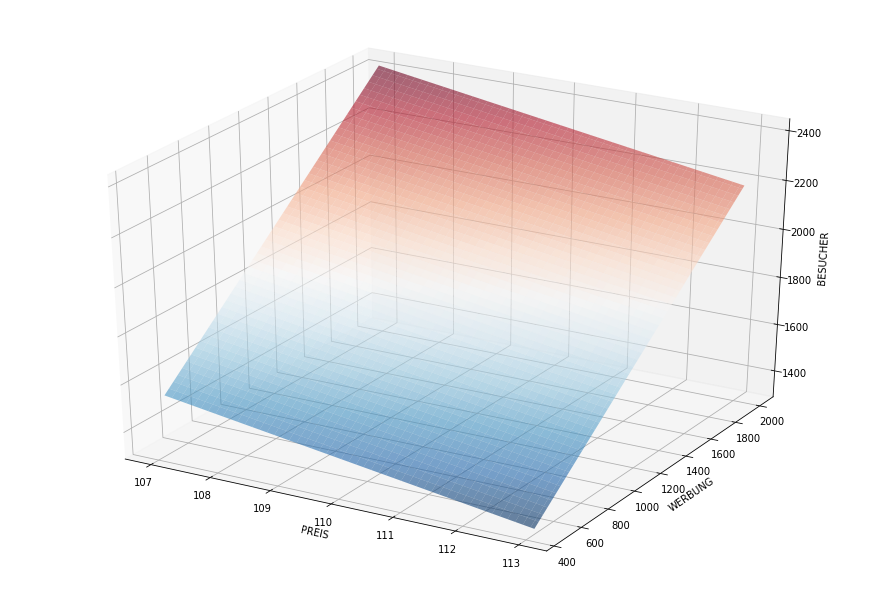

In [11]:
# Erstelle die matplotlib 3d-Achsen
fig_1 = plt.figure(figsize=(12, 8))
ax_1 = Axes3D(fig_1)

# Hyperebene plotten
surface_1 = ax_1.plot_surface(xx1_1, xx2_1, Z_1, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# Datenpunkte plotten - Punkte über der Hyperebene sind weiß, Punkte darunter schwarz
# residuals = dependent_var - estimation.predict(independent_vars)

# ax_1.scatter(independent_vars[residuals >= 0].PREIS, independent_vars[residuals >= 0].WERBUNG, dependent_var[residuals >= 0], color='black', alpha=1.0, facecolor='white')
# ax_1.scatter(independent_vars[residuals < 0].PREIS, independent_vars[residuals < 0].WERBUNG, dependent_var[residuals < 0], color='black', alpha=1.0)

ax_1.set_xlabel('PREIS')
ax_1.set_ylabel('WERBUNG')
ax_1.set_zlabel('BESUCHER')

#### Besucher in Abhängigkeit von Werbung und CD-Verkauf

Text(0.5,0,'BESUCHER')

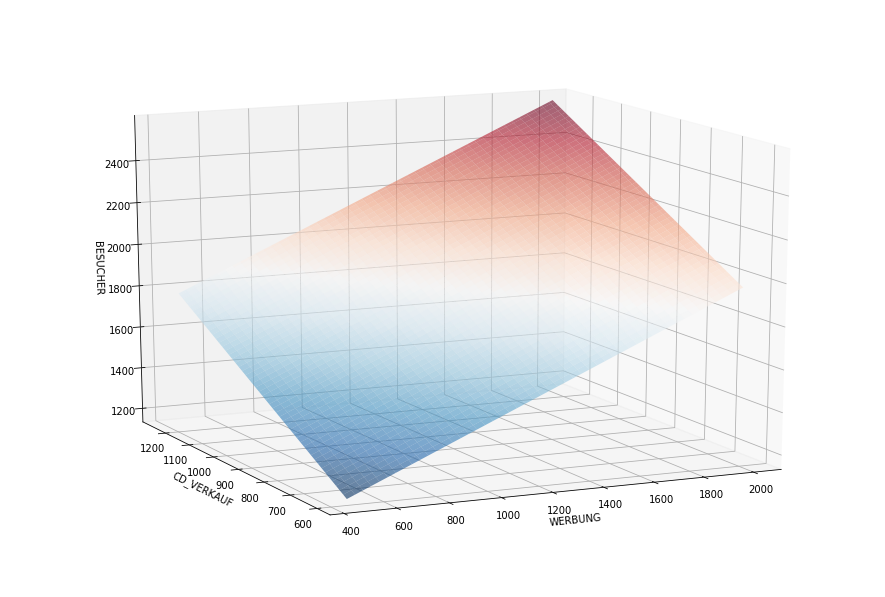

In [12]:
fig_2 = plt.figure(figsize=(12, 8))
ax_2 = Axes3D(fig_2, azim=-115, elev=15)

surface_2 = ax_2.plot_surface(xx2_2, xx3_2, Z_2, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# residuals = dependent_var - estimation.predict(independent_vars)

# ax_2.scatter(independent_vars[residuals >= 0].WERBUNG, independent_vars[residuals >= 0].CD_VERKAUF, dependent_var[residuals >= 0], color='black', alpha=1.0, facecolor='white')
# ax_2.scatter(independent_vars[residuals < 0].WERBUNG, independent_vars[residuals < 0].CD_VERKAUF, dependent_var[residuals < 0], color='black', alpha=1.0)

ax_2.set_xlabel('WERBUNG')
ax_2.set_ylabel('CD_VERKAUF')
ax_2.set_zlabel('BESUCHER')

#### Besucher in Abhängigkeit von Preis und CD-Verkauf

Text(0.5,0,'BESUCHER')

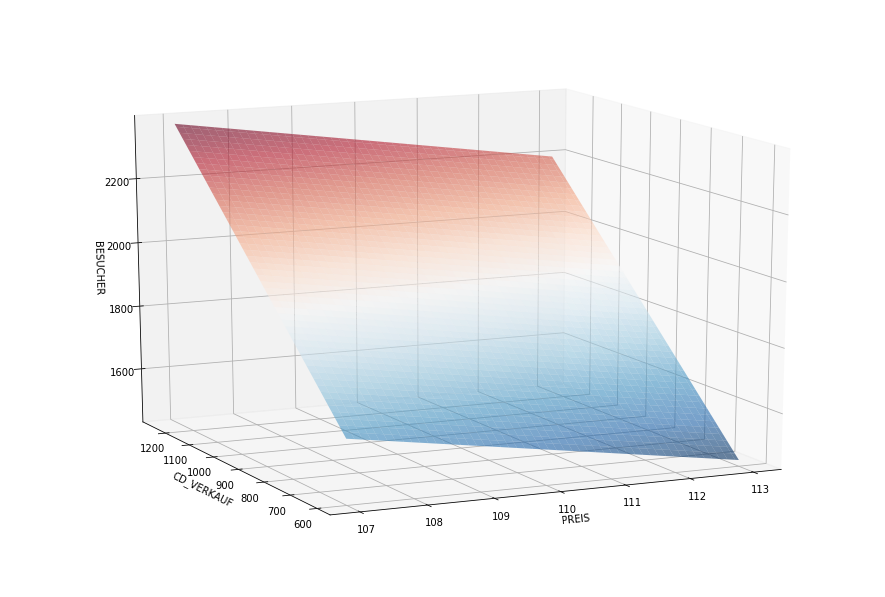

In [13]:
fig_3 = plt.figure(figsize=(12, 8))
ax_3 = Axes3D(fig_3, azim=-115, elev=15)

surface_3 = ax_3.plot_surface(xx1_3, xx3_3, Z_3, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# residuals = dependent_var - estimation.predict(independent_vars)

# ax_3.scatter(independent_vars[residuals >= 0].PREIS, independent_vars[residuals >= 0].CD_VERKAUF, dependent_var[residuals >= 0], color='black', alpha=1.0, facecolor='white')
# ax_3.scatter(independent_vars[residuals < 0].PREIS, independent_vars[residuals < 0].CD_VERKAUF, dependent_var[residuals < 0], color='black', alpha=1.0)

ax_3.set_xlabel('PREIS')
ax_3.set_ylabel('CD_VERKAUF')
ax_3.set_zlabel('BESUCHER')